<a href="https://colab.research.google.com/github/ilmahamala/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Base library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils import resample

# Others
import warnings
warnings.filterwarnings("ignore")

## **Menelaah data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024_ITK_DS_Training/Telco-Customer-Churn.csv')

# Menampilkan baris paling atas
print("Baris atas:")
display(df.head())

# Menampilkan baris paling bawah
print("\nBaris bawah:")
display(df.tail())

Baris atas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Baris bawah:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
print("Jumlah baris dataset:", len(df))

Jumlah baris dataset: 7043


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Memeriksa jumlah unique values di setiap kolom
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique values"]).T

,unique values
customerID,7043
gender,4
SeniorCitizen,2
Partner,2
Dependents,2
tenure,78
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
import pandas as pd
import numpy as np

# Replace empty strings and whitespace with NaN before conversion
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '').str.replace(',', '.').replace('', np.nan).astype(float)
# Replacing empty strings('') with NaN using numpy.nan after replacing whitespace and comma

In [ ]:
import pandas as pd
import numpy as np

# Convert 'TotalCharges' to string type before using .str methods
df['TotalCharges'] = df['TotalCharges'].astype(str)

# Replace empty strings and whitespace with NaN before conversion
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '').str.replace(',', '.').replace('', np.nan)

# Convert to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7040.000000,7043.000000,7032.000000
mean,0.162147,35.043892,64.761692,2283.300441
std,0.368612,115.282871,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,7100.000000,118.750000,8684.800000


### Exploratory Data Analysis (EDA)

In [ ]:
df.drop('customerID', axis=1, inplace=True)

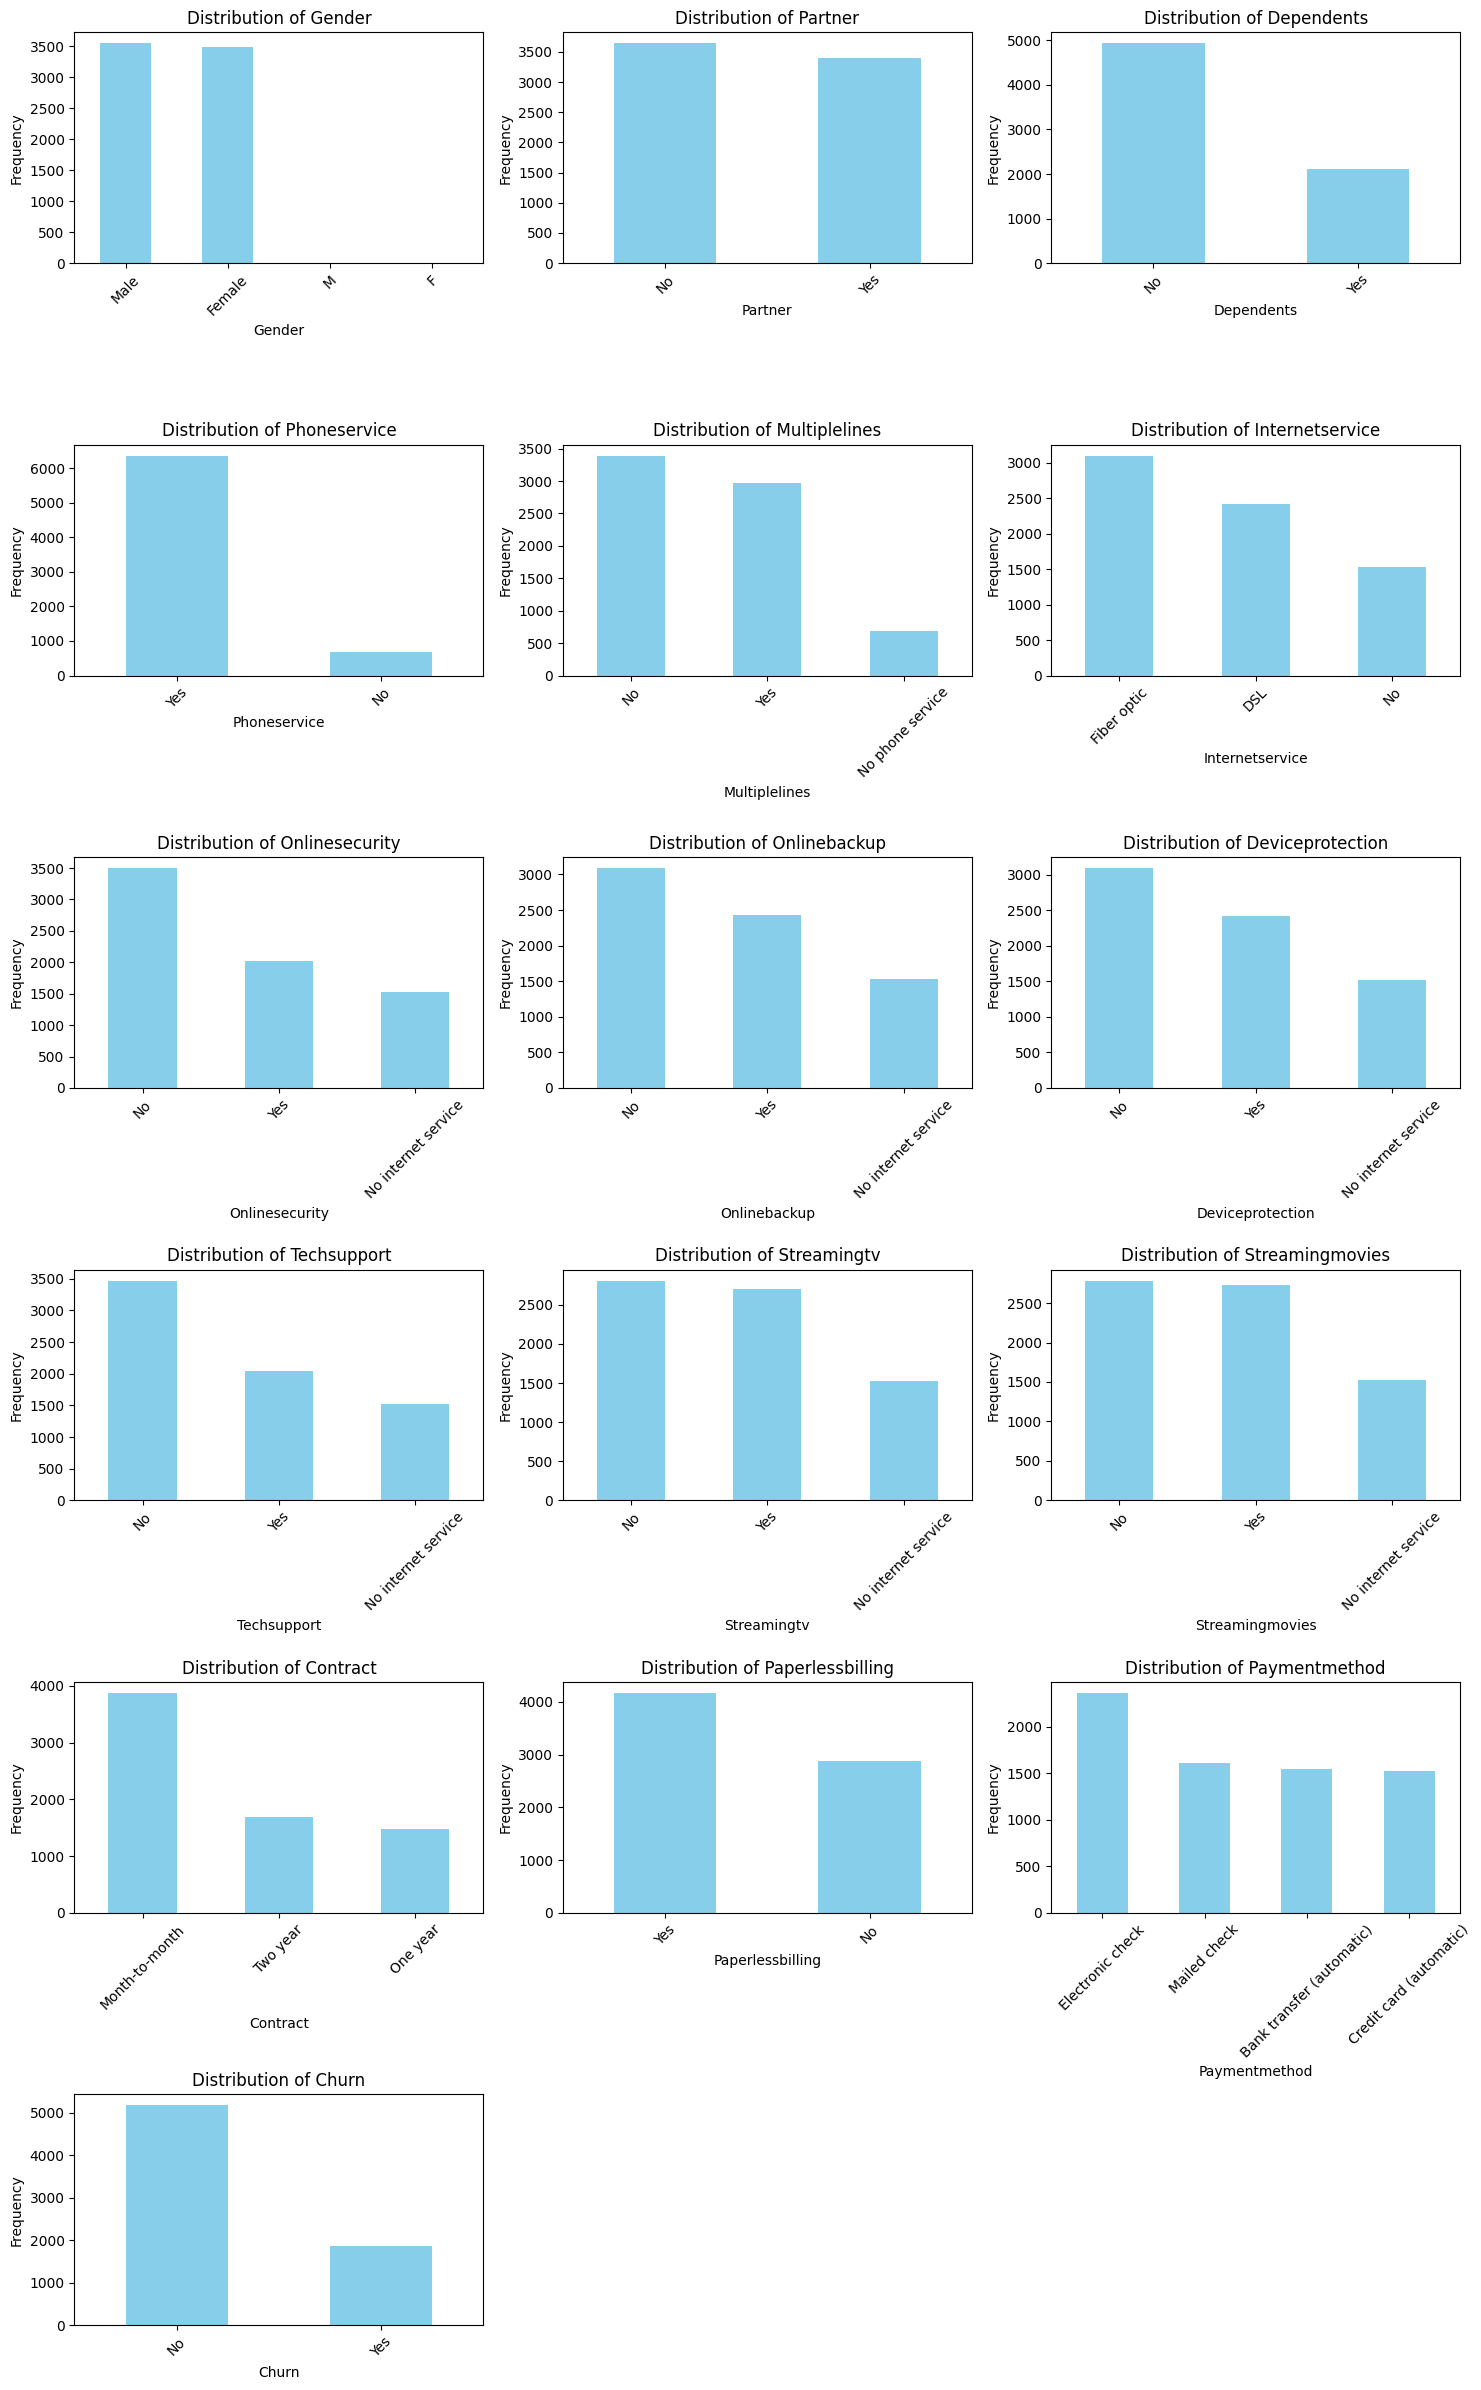

In [ ]:
# Menyimpan kolom bertipe data 'object'
object_columns = df.select_dtypes(include=['object']).columns
num_columns = len(object_columns)

columns_per_row = 3
rows = (num_columns + columns_per_row - 1) // columns_per_row  # Hitung jumlah baris

# Membuat subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4))
axes = axes.flatten()  # Mengubah array 2D menjadi 1D untuk memudahkan iterasi

# Loop melalui setiap kolom bertipe object dan plot ke dalam subplot
for i, column in enumerate(object_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {column.replace('_', ' ').title()}")
    axes[i].set_xlabel(column.replace('_', ' ').title())
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=45)

# Menghilangkan axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

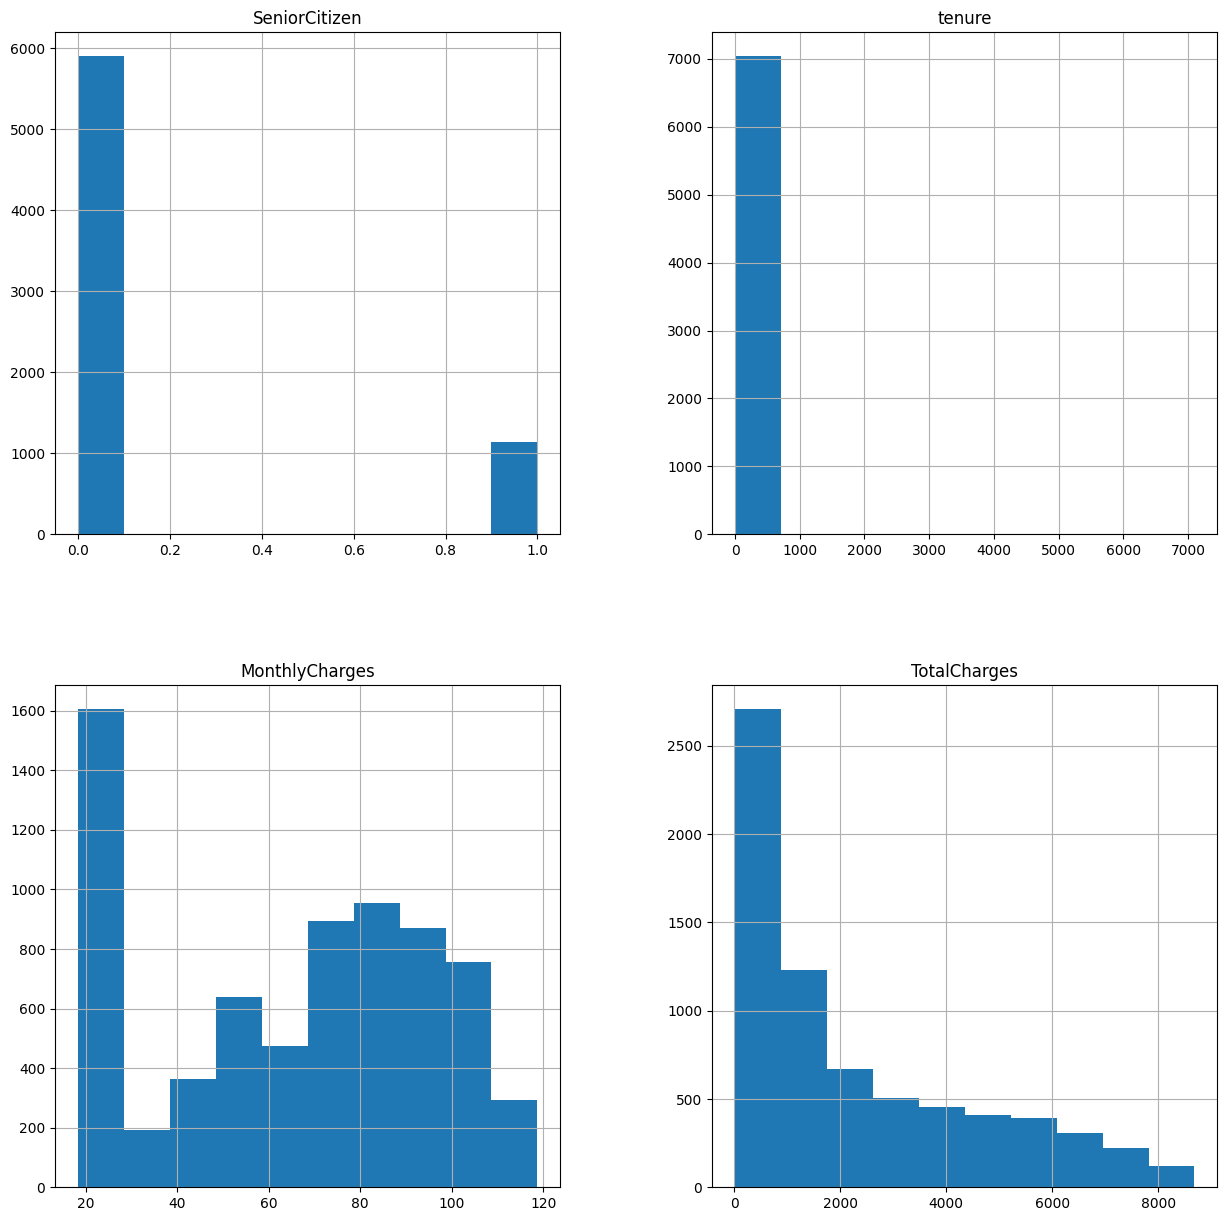

In [ ]:
df.hist(figsize = (15, 15))
plt.show()

## **Validasi data**

### Cek Anomali

In [ ]:
# prompt: nampilin jumlah gender

# Display the count of each gender
print(df['gender'].value_counts())

gender
Male      3550
Female    3483
M            3
F            2
Name: count, dtype: int64


### Cek Outlier

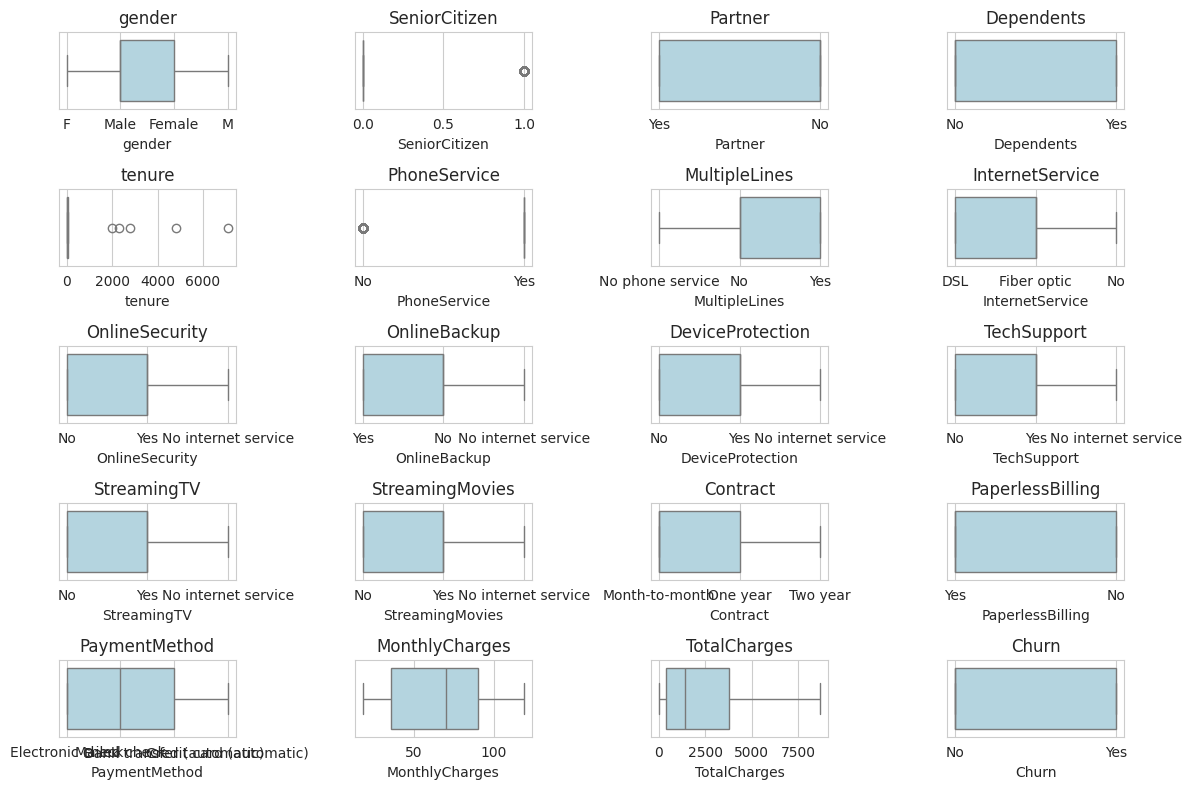

In [ ]:
# Memeriksa outlier dengan boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Membuat boxplot untuk setiap fitur, menggunakan figsize yang sesuai
# dengan jumlah kolom dan menentukan jumlah kolom subplot
num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4  # Menghitung jumlah baris yang dibutuhkan, +3 untuk memastikan cukup ruang

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 4, i + 1)  # Mengatur grid subplot secara dinamis
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
fitur_kontinu = ['SeniorCitizen', 'TotalCharges', 'tenure']

Q1 = df[fitur_kontinu].quantile(0.25)
Q3 = df[fitur_kontinu].quantile(0.75)
IQR = Q3 - Q1
outliers_count= ((df[fitur_kontinu] < (Q1 - 1.5 * IQR)) | (df[fitur_kontinu] > (Q3 + 1.5 * IQR))).sum()
outliers_count

,0
SeniorCitizen,1142
TotalCharges,0
tenure,5


### Cek Duplikat

In [ ]:
df.duplicated().value_counts()

,count
False,7021
True,22


In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Display the duplicate rows (optional)
print("\nDuplicate Rows:")
display(duplicate_rows)

Number of duplicate rows: 22

Duplicate Rows:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


### Cek Nilai Null

In [ ]:
df.isnull().sum()

,0
gender,5
SeniorCitizen,0
Partner,0
Dependents,0
tenure,3
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## **Membersihkan Data**

### Handling Anomali

In [ ]:
# Replace 'M' with 'Male' and 'F' with 'Female' in the 'gender' column
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})

# Display the updated count of each gender to verify the changes
print(df['gender'].value_counts())

gender
Male      3553
Female    3485
Name: count, dtype: int64


### Handling outlier

In [ ]:
# Membuat fungsi untuk mengatasi outliers menggunakan metode IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound), median)

# Daftar kolom yang memiliki outliers dari identifikasi EDA dan inferensi
outlier_columns = ['tenure']

# Iterasi untuk setiap kolom dan atasi outliers dengan metode IQR
for col in outlier_columns:
    median = df[col].median()
    handle_outliers_iqr(df, col)

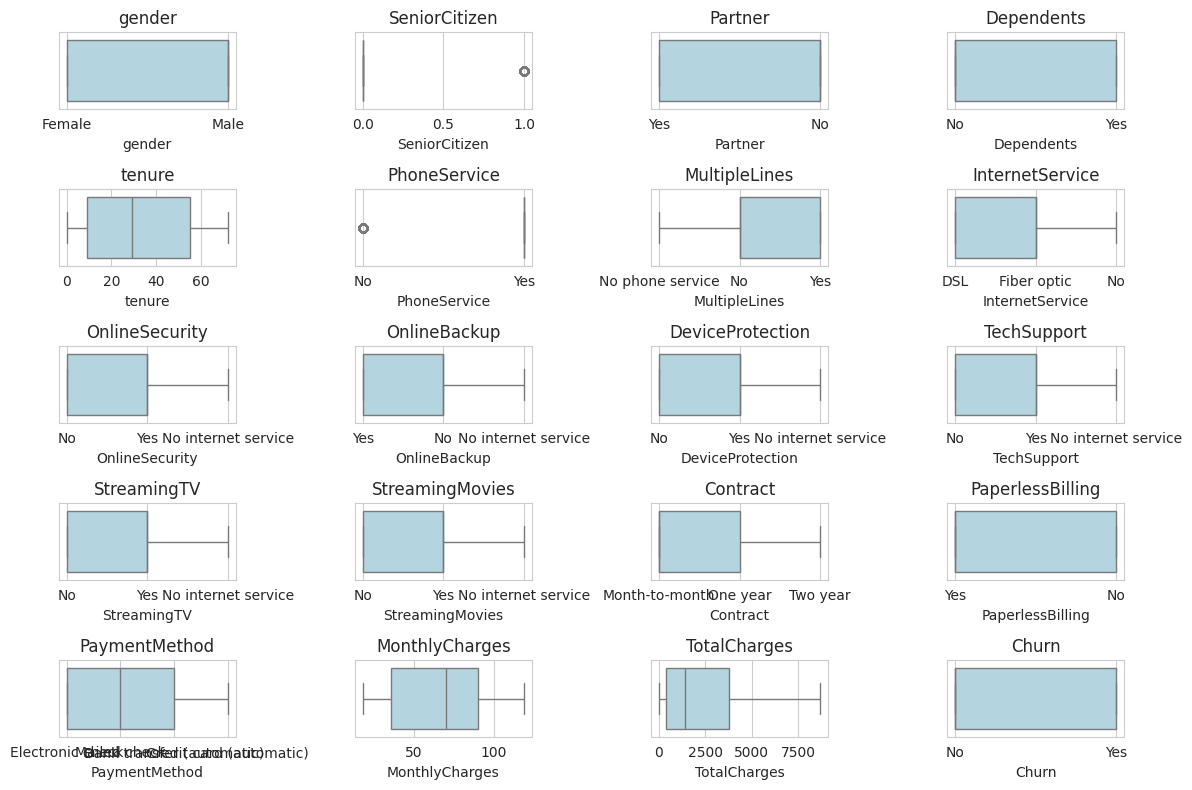

In [ ]:
# Memeriksa outlier lagi dengan boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Membuat boxplot untuk setiap fitur, menggunakan figsize yang sesuai
# dengan jumlah kolom dan menentukan jumlah kolom subplot
num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4  # Menghitung jumlah baris yang dibutuhkan, +3 untuk memastikan cukup ruang

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 4, i + 1)  # Mengatur grid subplot secara dinamis
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()

### Handling duplikat data

In [ ]:
# Remove duplicate rows
dataset_cleaned = df.drop_duplicates()
# Print the number of rows after removing duplicates (optional)
print(f"\nNumber of rows after removing duplicates: {len(dataset_cleaned)}")


Number of rows after removing duplicates: 7021


### Handling nilai null

In [ ]:
# handling nilai null
dataset_cleaned.dropna(inplace=True)
dataset_cleaned.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
dataset_cleaned.shape

(7003, 20)

## **Kontruksi data**

### Label encoding

In [ ]:
# prompt: kode label encoding untuk data yang objective

# Create a LabelEncoder object
le = LabelEncoder()

# Define the columns to be label encoded
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod', 'InternetService', 'Churn']

# Apply label encoding to each specified column
for col in categorical_cols:
    dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col])

dataset_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
# Memeriksa jumlah unique values di setiap kolom
dict = {}
for i in list(dataset_cleaned.columns):
    dict[i] = dataset_cleaned[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique values"]).T

,unique values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


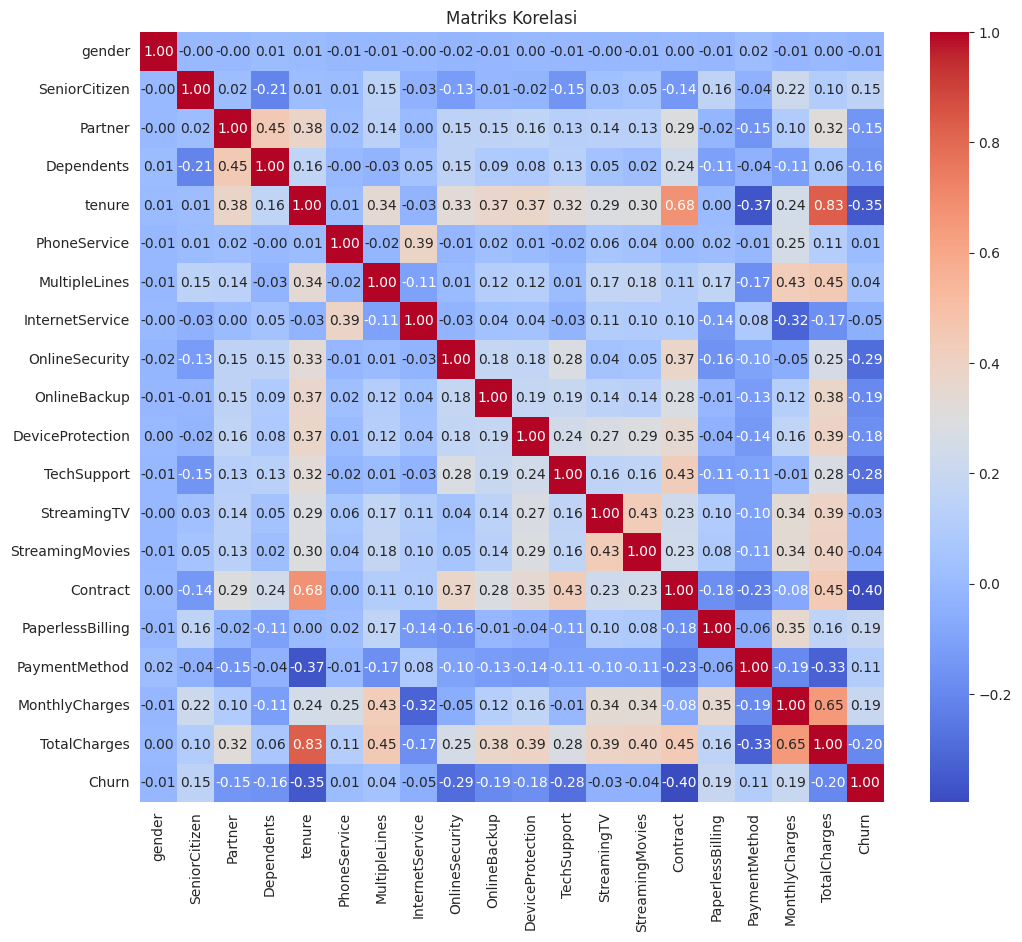

In [ ]:
# Menghitung Matriks Korelasi
correlation_matrix = dataset_cleaned.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

### Standar scaler

In [ ]:
# prompt: kode untuk melakukan standar scaler

# Assuming 'dataset_cleaned' is your DataFrame after preprocessing

# Select numerical features for scaling
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
dataset_cleaned[numerical_features] = scaler.fit_transform(dataset_cleaned[numerical_features])

dataset_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.285703,0,1,0,0,2,0,0,0,0,0,1,2,-1.165358,-0.997178,0
1,1,0,0,0,0.060269,1,0,0,2,0,2,0,0,0,1,0,3,-0.263658,-0.176814,0
2,1,0,0,0,-1.244916,1,0,0,2,2,0,0,0,0,0,1,3,-0.366805,-0.962637,1
3,1,0,0,0,0.508926,0,1,0,2,0,2,2,0,0,1,0,0,-0.751108,-0.198319,0
4,0,0,0,0,-1.244916,1,0,1,0,0,0,0,0,0,0,1,2,0.193846,-0.943447,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.347601,1,2,0,2,0,2,2,2,2,1,1,3,0.662996,-0.132259,0
7039,0,0,1,1,1.610176,1,2,1,0,2,2,0,2,2,1,1,1,1.275221,2.237717,0
7040,0,0,1,1,-0.877832,0,1,0,2,0,0,0,0,0,0,1,2,-1.173676,-0.857513,0
7041,1,1,1,0,-1.163342,1,2,1,0,0,0,0,0,0,0,1,3,0.316957,-0.875093,1


##**Label data**

In [ ]:
target = dataset_cleaned['Churn']
target

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


## **Membangun model**

In [ ]:
dataset_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.285703,0,1,0,0,2,0,0,0,0,0,1,2,-1.165358,-0.997178,0
1,1,0,0,0,0.060269,1,0,0,2,0,2,0,0,0,1,0,3,-0.263658,-0.176814,0
2,1,0,0,0,-1.244916,1,0,0,2,2,0,0,0,0,0,1,3,-0.366805,-0.962637,1
3,1,0,0,0,0.508926,0,1,0,2,0,2,2,0,0,1,0,0,-0.751108,-0.198319,0
4,0,0,0,0,-1.244916,1,0,1,0,0,0,0,0,0,0,1,2,0.193846,-0.943447,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.347601,1,2,0,2,0,2,2,2,2,1,1,3,0.662996,-0.132259,0
7039,0,0,1,1,1.610176,1,2,1,0,2,2,0,2,2,1,1,1,1.275221,2.237717,0
7040,0,0,1,1,-0.877832,0,1,0,2,0,0,0,0,0,0,1,2,-1.173676,-0.857513,0
7041,1,1,1,0,-1.163342,1,2,1,0,0,0,0,0,0,0,1,3,0.316957,-0.875093,1


### Model fitting (modelling semua dataset)

In [ ]:
# Membagi variabel menjadi variabel dependent dan independent
X = dataset_cleaned.drop('Churn', axis=1)
y = dataset_cleaned['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

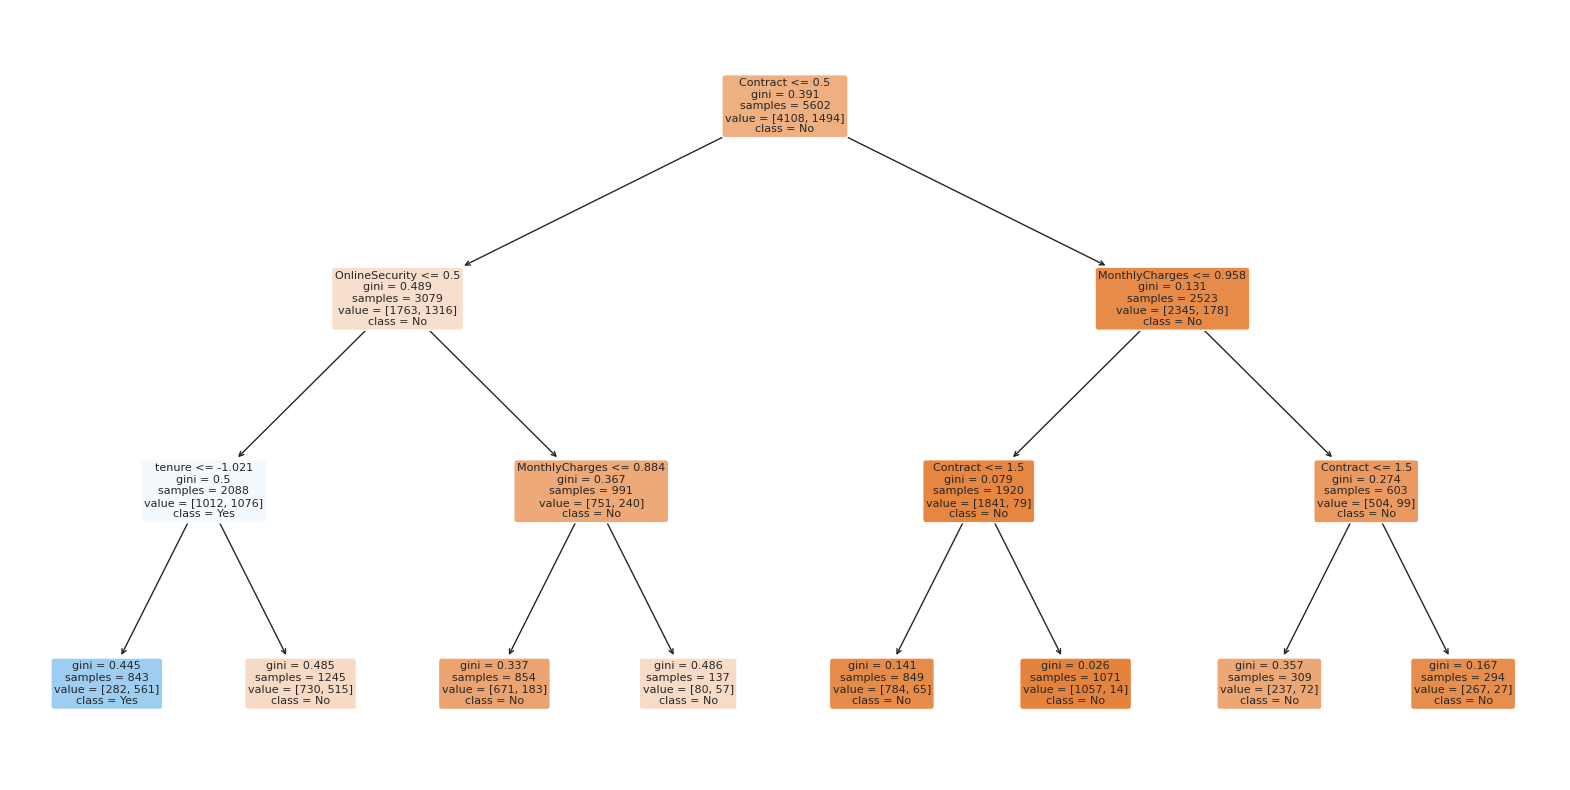

In [ ]:
# prompt: visualisasikan model Decision Tree hasil training

from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=3) # You can adjust max_depth
model.fit(X_train, y_train)




# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X.columns,  # Use feature names for better readability
          class_names=['No', 'Yes'], # Use class names
          filled=True, rounded=True, fontsize=8)
plt.show()

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your dataset loaded in a variable called 'dataset_cleaned'
# and target variable is 'Churn'

# Separate features (X) and target (y)
X = dataset_cleaned.drop('Churn', axis=1)
y = dataset_cleaned['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean') # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "XGBoost": XGBClassifier(objective='binary:logistic', random_state=42)

}

# Initialize DataFrame to store model performance metrics
df_model_fitting = pd.DataFrame(columns=["Model Name", "Accuracy", "Precision", "Recall", "F1-Score"])

for name, model in models.items():
    # Fit the model using the imputed training data
    model.fit(X_train_imputed, y_train)
    predictions = model.predict(X_test_imputed)  # Use imputed test data for predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Append results to DataFrame
    df_model_fitting.loc[len(df_model_fitting)] = [name, accuracy, precision, recall, f1]

print('Hasil Model Fitting:')
display(df_model_fitting)

Hasil Model Fitting:


,Model Name,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.773019,0.61000,0.337017,0.434164
1,XGBoost,0.777302,0.57764,0.513812,0.543860


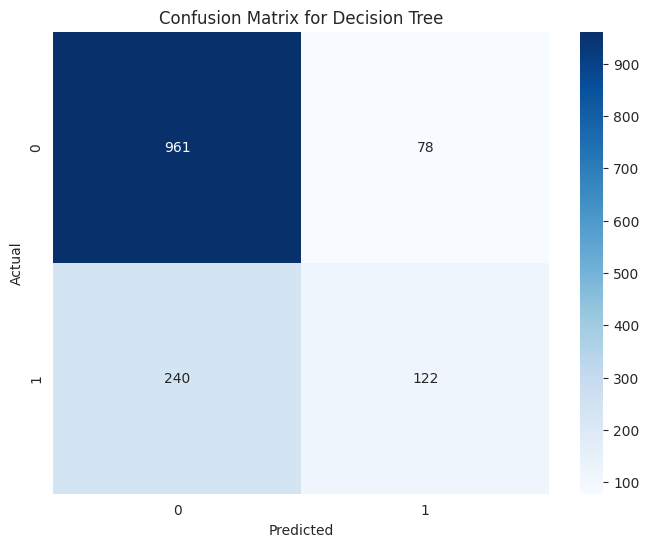

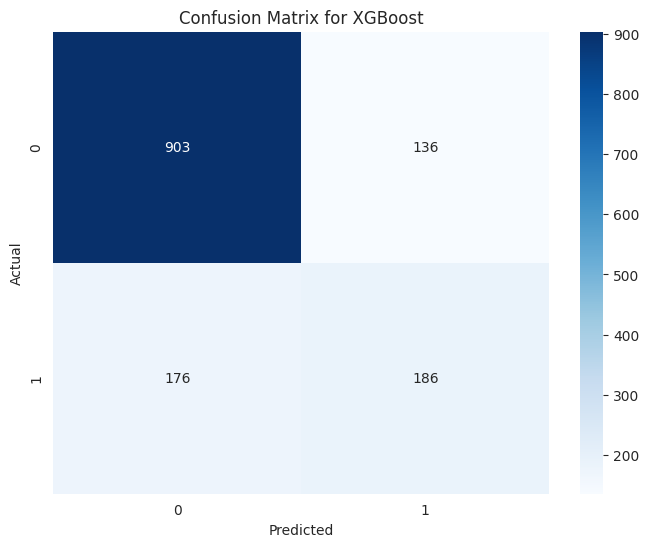

In [ ]:

# Assuming 'models' dictionary and X_test_imputed, y_test from previous code
for name, model in models.items():
    # Predict on the test set using the imputed test data
    predictions = model.predict(X_test_imputed)

    # Instead of using a subset, align predictions with original y_test using indices
    y_test_aligned = y_test[X_test.index.isin(X_test.index)] # Align y_test with imputed X_test indices

    # Ensure both arrays have the same length
    min_len = min(len(y_test_aligned), len(predictions))
    y_test_aligned = y_test_aligned[:min_len]
    predictions = predictions[:min_len]

    # Now compute the confusion matrix:
    cm = confusion_matrix(y_test_aligned, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Remodelling berdasarkan best feature (feature importance)

['TotalCharges', 0.22344212398521004]
['MonthlyCharges', 0.1943454272014615]
['Contract', 0.16922482189383295]
['tenure', 0.11389203883917261]
['OnlineSecurity', 0.04376644183382349]
['PaymentMethod', 0.0376465507176385]
['InternetService', 0.02857999765637643]
['gender', 0.02683487925809658]
['Dependents', 0.021638797866090482]
['PaperlessBilling', 0.01933710458398816]
['DeviceProtection', 0.01767727082222744]
['TechSupport', 0.017248932622991965]
['SeniorCitizen', 0.0166259058961234]
['MultipleLines', 0.016074255470768736]
['OnlineBackup', 0.01576842800529118]
['Partner', 0.015755896163635815]
['StreamingMovies', 0.010457228965054466]
['StreamingTV', 0.009326004872704899]
['PhoneService', 0.002357893345511443]


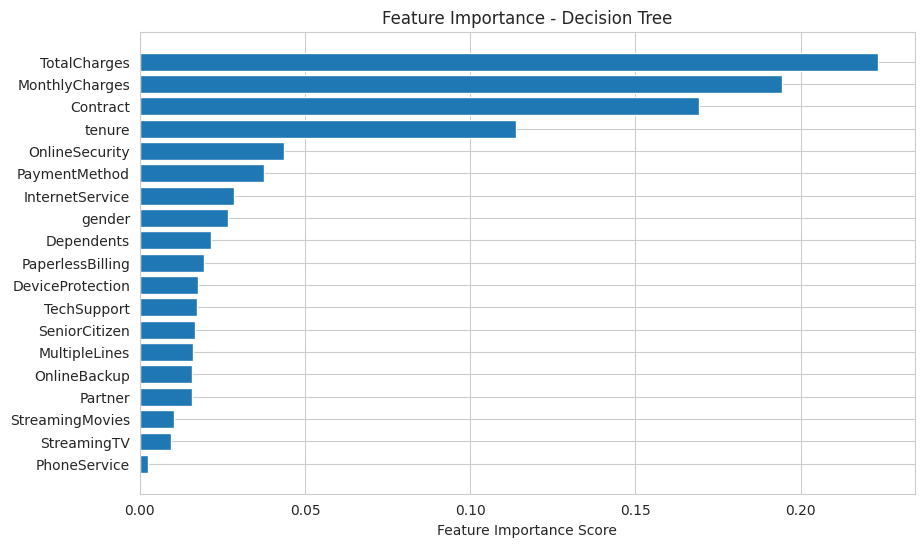

In [ ]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)

# Menghitung Skor Feature Importance
sorted_idx = np.argsort(model_dt.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], model_dt.feature_importances_[index]])

# Visualisasi Feature Importance untuk Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), model_dt.feature_importances_[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.gca().invert_yaxis()  # Membalik urutan y-axis untuk menempatkan skor tertinggi di atas
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance - Decision Tree')
plt.show()


In [ ]:
selected_featuresDT = dataset_cleaned[['TotalCharges', 'MonthlyCharges', 'Contract', 'Churn']]

X = selected_featuresDT.drop('Churn', axis=1)
y = selected_featuresDT['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Evaluation Matrix Decision Tree best 3 feature importance:
Accuracy: 0.78
Precision: 0.65
Recall: 0.37
F1 Score: 0.47



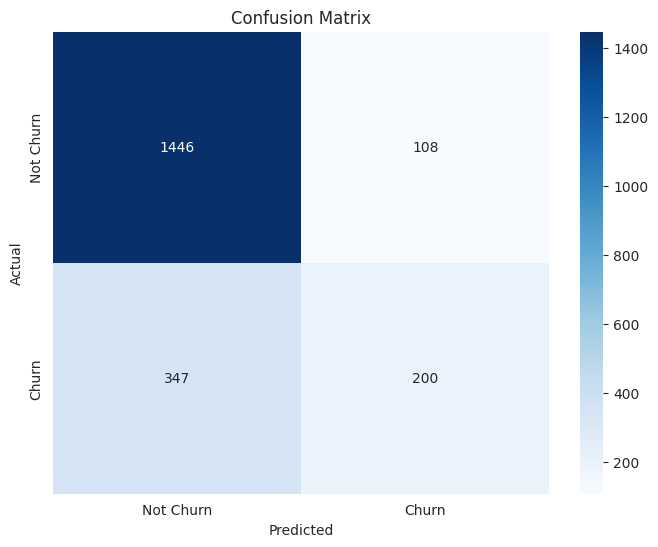

In [ ]:
import seaborn as sns

ModelDT = DecisionTreeClassifier(max_depth=3)

# Melatih model dengan data training
ModelDT.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = ModelDT.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Evaluation Matrix Decision Tree best 3 feature importance:')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}\n")


# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

['Contract', 0.8811951]
['MonthlyCharges', 0.06289925]
['TotalCharges', 0.055905636]


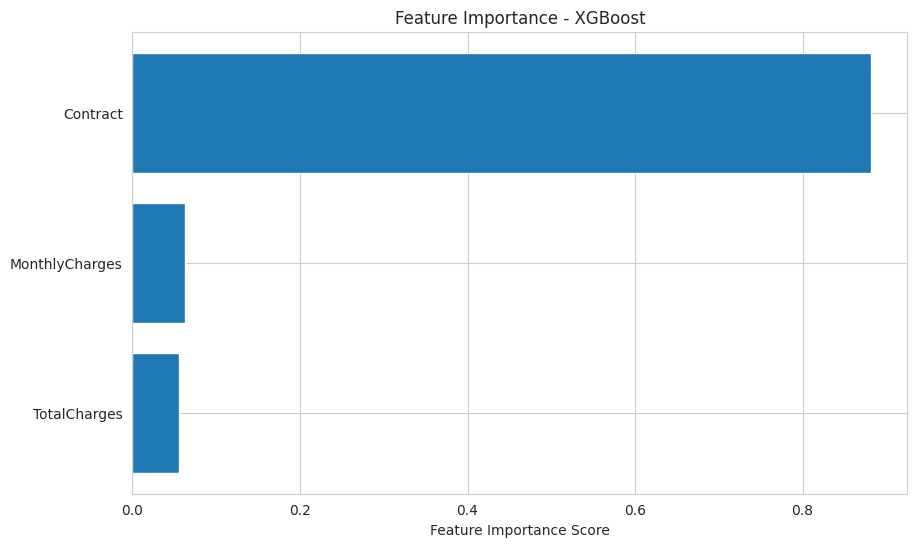

In [ ]:
import xgboost as xgb

# Fit XGBoost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X, y)

# Menghitung Skor Feature Importance
sorted_idx = np.argsort(model_xgb.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], model_xgb.feature_importances_[index]])

# Visualisasi Feature Importance untuk XGBoost
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), model_xgb.feature_importances_[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.gca().invert_yaxis()  # Membalik urutan y-axis untuk menempatkan skor tertinggi di atas
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance - XGBoost')
plt.show()



In [ ]:
selected_featuresXGB = dataset_cleaned[['Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']]

X = selected_featuresXGB.drop('Churn', axis=1)
y = selected_featuresXGB['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Evaluation Matrix XGBoost best 3 feature importance:
Accuracy: 0.75
Precision: 0.53
Recall: 0.46
F1 Score: 0.49



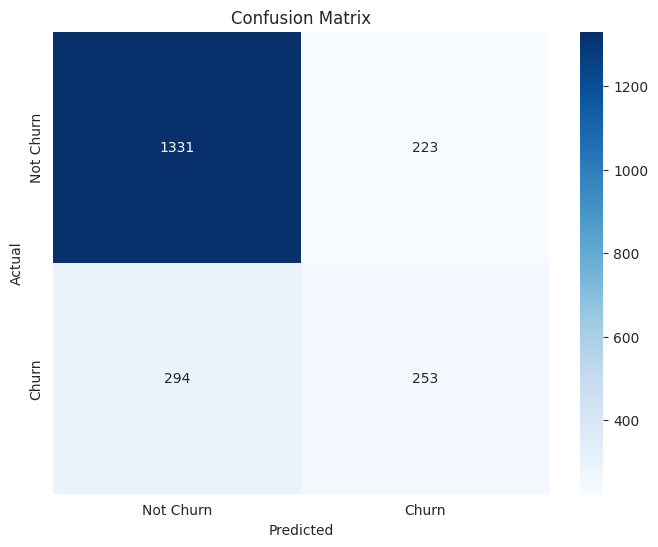

In [ ]:
import seaborn as sns

modelXGB = XGBClassifier(objective='binary:logistic', random_state=42)

# Melatih model dengan data training
modelXGB.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = modelXGB.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Evaluation Matrix XGBoost best 3 feature importance:')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}\n")


# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Remodelling dengan best parameter (hyperparameter tuning)

In [ ]:
# parameter distribution

# Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, 14],
    'min_samples_split': [2, 5, 10, 3, 4, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Logistic Regression
param_dist_lr = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2"],
    "solver": ["lbfgs", "newton-cg"],
    "max_iter": [100, 200, 300],
    "tol": [1e-3, 1e-4, 1e-5],
}

# XGBoost
param_dist_xgb = {
    "reg_alpha":[1e-5, 1e-2, 0.1, 100],
    "max_depth" : [3, 5, 7, 9],
    "C": np.logspace(-4, 0.0001, 4, 5),
    "kernel": ["linear", "rbf"],
    "gamma": np.logspace(-3, 1, 3, 5),
    "max_depth": [3, 5, 10],
    "learning_rate": [0.1, 0.01],
    "n_estimators": [100, 200]
}

In [ ]:
# RandomizedSearchCV - Decision Tree
dt_model = models["Decision Tree"]
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist_dt, n_iter=100, cv=5, random_state=0)
random_search_dt.fit(X, y)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best accuracy score for Decision Tree:", random_search_dt.best_score_)

Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'entropy'}
Best accuracy score for Decision Tree: 0.7818093198735597


In [ ]:
# RandomizedSearchCV - XGBoost
xgb_model = models["XGBoost"]
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=100, cv=5, random_state=0)
random_search_xgb.fit(X, y)

print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best accuracy score for XGBoost:", random_search_xgb.best_score_)

Best parameters for XGBoost: {'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'kernel': 'rbf', 'gamma': 0.001, 'C': 0.0001}
Best accuracy score for XGBoost: 0.7933752421739573


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict

# Menyimpan hasil evaluasi dalam bentuk matriks
evaluation_results_tuned = {
    'Model Name': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Assigning the tuned models from previous cells output
dt_model_tuned = random_search_dt.best_estimator_ # Assuming random_search_dt is defined in a prior cell
xgb_model_tuned = random_search_xgb.best_estimator_ # Assuming random_search_xgb is defined in a prior cell


# Melakukan evaluasi dengan cross-validation pada setiap model
for model_name, model in {"Decision Tree": dt_model_tuned, "XGBoost": xgb_model_tuned}.items():
    # Menggunakan cross_val_predict untuk mendapatkan prediksi setiap fold
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='binary')  # Ganti 'binary' ke 'macro' jika multiclass
    recall = recall_score(y, y_pred, average='binary')
    f1 = f1_score(y, y_pred, average='binary')

    # Menyimpan hasil metrik ke dalam dictionary
    evaluation_results_tuned['Model Name'].append(model_name)
    evaluation_results_tuned['Accuracy'].append(accuracy)
    evaluation_results_tuned['Precision'].append(precision)
    evaluation_results_tuned['Recall'].append(recall)
    evaluation_results_tuned['F1 Score'].append(f1)

# Mengonversi hasil ke DataFrame
evaluation_df_tuned = pd.DataFrame(evaluation_results_tuned)

print('After Tuning Evaluation Matrix:')
evaluation_df_tuned

After Tuning Evaluation Matrix:


,Model Name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.781808,0.652700,0.377694,0.478498
1,XGBoost,0.793374,0.646595,0.485991,0.554906


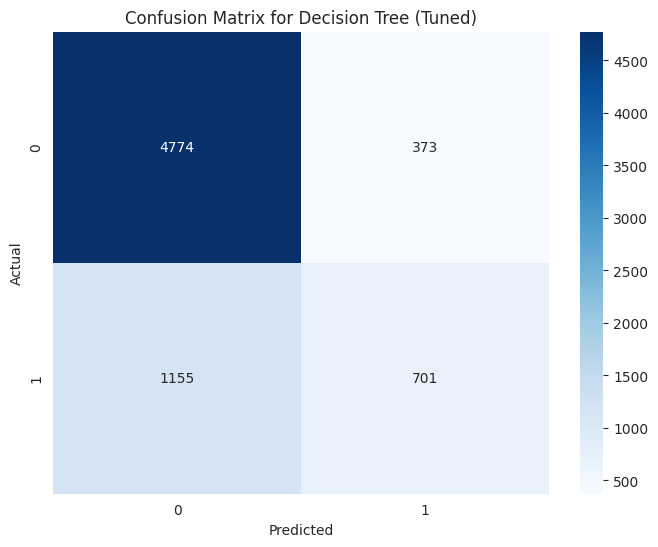

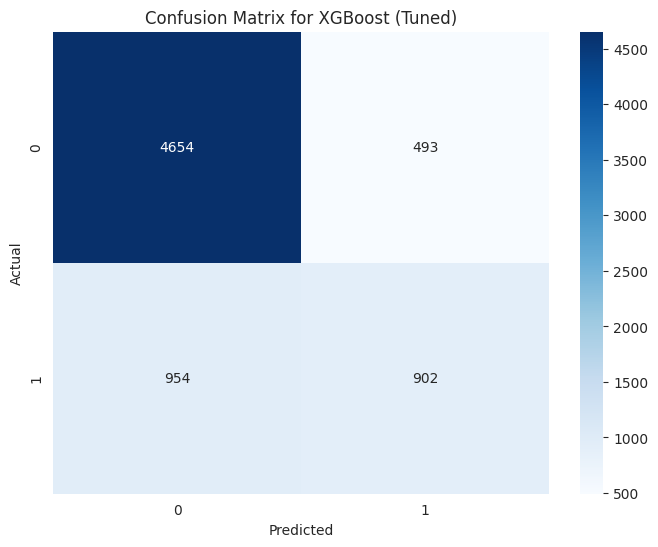

In [ ]:
# prompt: buatkan confusion matrix dari  evaluation_df_tuned

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'evaluation_df_tuned' and 'X', 'y' are defined from the previous code.
# Assuming dt_model_tuned and xgb_model_tuned are defined from the previous code
from sklearn.model_selection import cross_val_predict

for model_name, model in {"Decision Tree": dt_model_tuned, "XGBoost": xgb_model_tuned}.items():
    y_pred = cross_val_predict(model, X, y, cv=5)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name} (Tuned)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()